# Assignment 1

# Reference book: Deep Learning with Python by Francois Chollet

# Installing required packages needed to accomplish this assignment. Firstly i installed pandas using pip and every other packages are already installed. Importing the python packages needed.

In [1]:
# !pip install pandas
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM
import gc
import pandas as pd
import numpy as np 
import tensorflow as tf

# Load the IMDB dataset, splitting it into training data and labels, as well as testing data and labels. Only include the top 10,000 frequently used words in the dataset. Set a seed for randomization, ensuring consistent results

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, seed =4546)

## Decoding one of these reviews back to English words:



In [3]:
### Retrieve the word index from the IMDB dataset.
word_index = imdb.get_word_index()     

### Create a reverse word index by swapping keys and values.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])   

### Decode a review by converting a sequence of indices back into words, replacing any unknown tokens with a question mark.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])  

## Defining a function vectorize_sequences that converts a list of sequences into a binary matrix representation, where each row corresponds to a sequence and each column represents the presence of a specific word in that sequence. The default dimension is set to 10,000 for the vocabulary size.

In [4]:
def vectorize_sequences(sequences, dimension=10000): 
    # Initialize a matrix filled with zeros. Each row corresponds to a sequence, and each column to a word.
    results = np.zeros((len(sequences), dimension))
    # Iterate over each sequence and its index in the list.
    for i, sequence in enumerate(sequences):
        # Iterate over the indices in the current sequence.
        for j in sequence:
            # Set the corresponding element in the matrix to 1, indicating the presence of a word in the sequence.
            results[i, j] = 1.
    return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [7]:
final_eval_x_test_data = x_test[20000:]
final_eval_y_test_data = y_test[20000:]
final_train_x_data = np.concatenate((x_train, x_test[:20000]), axis=0)
final_train_y_data = np.concatenate((y_train, y_test[:20000]), axis=0)

# Deleting all the variables that are not needed downstream as we can release some memory and using garbage collection to remove them too.

In [8]:
del train_data, train_labels, test_data, test_labels
gc.collect()

0

# Creating a Keras model configuration with 2 layers with relu activation, using rmsprop optimizer, loss type as binary crossentropy as it is two categories in the response variable

In [57]:

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [58]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# Creating validation dataset and partial training data set

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Fit the neural network we specified above with batch_size of 512 and 20 epochs

In [61]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5595 - accuracy: 0.7615 - val_loss: 0.4390 - val_accuracy: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3492 - accuracy: 0.8988 - val_loss: 0.3584 - val_accuracy: 0.8567
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2504 - accuracy: 0.9261 - val_loss: 0.2890 - val_accuracy: 0.8929
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1902 - accuracy: 0.9440 - val_loss: 0.3166 - val_accuracy: 0.8735
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1541 - accuracy: 0.9530 - val_loss: 0.2935 - val_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1270 - accuracy: 0.9644 - val_loss: 0.2906 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1035 - accuracy: 0.9722 - val_loss: 0.2993 - val_accuracy: 0.8871
Epoch 8/20
30

# Plotting the training and validation accuracy and loss over number of epochs

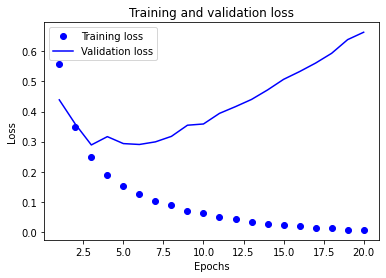

In [63]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

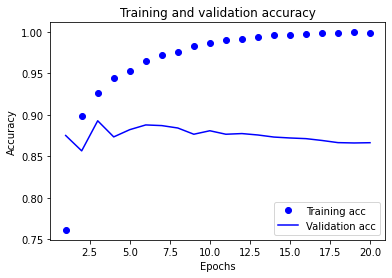

In [64]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# It seems like 3 or 4 epochs seems to be doing a good job from the above plots, but they have almost the same loss and the accuracy. I will be using 4 epochs because the validation loss/accuracy values seem to be the same for 3 or 4 epochs

# Initial Keras model

## Configuration:
4 epochs, 512 batch_size using rmsprop optimizer and binary_crossentropy as loss type. Activation functions used for hidden layers is relu

In [77]:
# Setting seed to 4546 to nor randomize in the future
tf.random.set_seed(4546)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 17ms/step - loss: 0.4732 - accuracy: 0.8094
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2706 - accuracy: 0.9081
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2066 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 1s 680us/step - loss: 0.2904 - accuracy: 0.8850


In [78]:
print(results)

[0.2904352843761444, 0.8850399851799011]


### The validation loss is 0.885 and we can probably do better with hyperparameter tuning below.

# Assigment questions:
### - You used two hidden layers. Try using one or three hidden layers and see how doing so affects validation and test accuracy.
### - Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on.
### - Try using the mse loss function instead of binary_crossentropy.
### - Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.
### - Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation

# I have written a code to iterate through
- List of layers that i want to use as per the question(1, 2, 3)
- List of hidden units to use in the neural network(16, 32, 64)
- List of activation functions(tanh, relu)
- List of regularizations(dropout, batchnormalization and no regularozation)
- List of optimizers(adam, rmsprop)
- List of loss_types to use(mse, binary cross entropy)

I used 4 epochs as per the above plots.

In [9]:
# Define the number of training epochs (in this case, only 4 epochs are specified)
num_epochs = [4]
tf.random.set_seed(4546) # setting seed to 4546
# Define the hyperparameters to test
num_layers = [1, 2, 3]  # Number of layers in the neural network
num_units = [16, 32, 64]  # Number of units/neurons in each layer
activations = ['tanh', 'relu']  # Activation functions to test
batch_sizes = [128, 512]  # Batch sizes for training
regularizations = [None, 'dropout', 'batchnorm']  # Regularization techniques to test
optimizers = ['adam', 'rmsprop']  # Optimization algorithms to test
loss_types =['mse', 'binary_crossentropy']  # Loss functions to test

# Initialize a list to store the results
results = []

# Iterating through the list of hyperparameters:
for layer in num_layers:  # Iterate over different numbers of layers
    for unit in num_units:  # Iterate over different numbers of units/neurons
        for activation in activations:  # Iterate over different activation functions
            for batch_size in batch_sizes:  # Iterate over different batch sizes
                for regularization in regularizations:  # Iterate over different regularization techniques
                    for optimize_algo in optimizers:  # Iterate over different optimization algorithms
                        for losstype in loss_types:  # Iterate over different loss functions
                            for epoch in num_epochs:  # Iterate over different numbers of epochs
                                # Build the model
                                model = keras.Sequential()

                                # Add Dense layers
                                for i in range(layer):  # Add the specified number of layers to the model
                                    model.add(layers.Dense(unit, activation=activation))
                                    if regularization == 'dropout':  # Add dropout regularization if specified
                                        model.add(Dropout(0.5))
                                    elif regularization == 'batchnorm':  # Add batch normalization if specified
                                        model.add(BatchNormalization())

                                model.add(layers.Dense(1, activation="sigmoid"))  # Output layer with sigmoid activation

                                # Compile and train the model
                                model.compile(optimizer=optimize_algo, loss=losstype, metrics=["accuracy"])
                                model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size)

                                # Evaluate the model
                                result = model.evaluate(x_test, y_test)

                                # Extend the result list with additional information
                                result.extend([epoch, layer, unit, activation, batch_size, regularization, optimize_algo, losstype])
                                results.append(result)

                                # Delete the model to free up memory
                                del model, result

                                # Collect garbage to free up any unused memory
                                gc.collect()

Epoch 1/4
196/196 [==============================] - 2s 6ms/step - loss: 0.1074 - accuracy: 0.8640
Epoch 2/4
196/196 [==============================] - 1s 6ms/step - loss: 0.0583 - accuracy: 0.9272
Epoch 3/4
196/196 [==============================] - 1s 6ms/step - loss: 0.0440 - accuracy: 0.9487
Epoch 4/4
782/782 [==============================] - 1s 608us/step - loss: 0.0969 - accuracy: 0.8711
Epoch 1/4
196/196 [==============================] - 1s 6ms/step - loss: 0.3517 - accuracy: 0.8619
Epoch 2/4
196/196 [==============================] - 1s 6ms/step - loss: 0.2031 - accuracy: 0.9231
Epoch 3/4
196/196 [==============================] - 1s 6ms/step - loss: 0.1564 - accuracy: 0.9456
Epoch 4/4
782/782 [==============================] - 1s 760us/step - loss: 0.3566 - accuracy: 0.8722
Epoch 1/4
196/196 [==============================] - 1s 5ms/step - loss: 0.1061 - accuracy: 0.8684
Epoch 2/4
196/196 [==============================] - 1s 4ms/step - loss: 0.0606 - accuracy: 0.9228
Epoch 

In [ ]:
final_df =pd.DataFrame(results, columns=['loss_val', 'validation_accuracy_val', 'epoch', 'layers', 'units', 'activation', 'batch_size','regularization', 'optimizer_name','loss_type'])

In [11]:
final_df.to_csv('more_combinations_model_accuracies.csv',index=False)

In [13]:
final_df = pd.read_csv('more_combinations_model_accuracies.csv')

In [85]:
# get the maximum validation accuracy from the various models we tried 
final_df['validation_accuracy_val'].max() # 0.8907999992370605

0.8907999992370605

In [87]:
# get the minimum loss from the various models we tried 
final_df['loss_val'].min() # 0.08239934593439102


0.08239934593439102

In [86]:
final_df[final_df.validation_accuracy_val==0.8907999992370605] # Accuracy of the best model is 0.8908 that is slightly higher than 0.885

,loss_val,validation_accuracy_val,epoch,layers,units,activation,batch_size,regularization,optimizer_name,loss_type
91,0.273701,0.8908,4,1,32,relu,512,dropout,rmsprop,binary_crossentropy


In [88]:
final_df[final_df.loss_val==0.08239934593439102] # Loss is 0.08 which is way lower than the initial model with 0.29 loss

,loss_val,validation_accuracy_val,epoch,layers,units,activation,batch_size,regularization,optimizer_name,loss_type
234,0.082399,0.89036,4,2,32,relu,512,dropout,rmsprop,mse


# Now training the 2 best models as per the hyperparameter tuning results considering the maximum validation accuracy and minimum validation_loss
- 4 epochs, 1 layer, 32 hidden units, relu activation, 512 batch_size, dropout(0.5), rmsprop optimizer and binary_crossentropy as loss_type


In [9]:
tf.random.set_seed(4546)
model_final_1 = keras.Sequential()
model_final_1.add(layers.Dense(32, activation='relu'))
model_final_1.add(Dropout(0.5))
model_final_1.add(layers.Dense(1, activation="sigmoid"))
model_final_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=["accuracy"])
model_final_1.fit(final_train_x_data, final_train_y_data, epochs=4, batch_size=512)
# Evaluate the model on the final testing(unseen) data
results = model_final_1.evaluate(final_eval_x_test_data, final_eval_y_test_data)
print(results)

Epoch 1/4
88/88 [==============================] - 3s 24ms/step - loss: 0.4024 - accuracy: 0.8313
Epoch 2/4
88/88 [==============================] - 2s 21ms/step - loss: 0.2623 - accuracy: 0.9023
Epoch 3/4
88/88 [==============================] - 2s 20ms/step - loss: 0.2211 - accuracy: 0.9169 0s - loss: 0.2198 - accuracy: 0.
Epoch 4/4
157/157 [==============================] - 0s 711us/step - loss: 0.2405 - accuracy: 0.9028
[0.24047331511974335, 0.9028000235557556]


# Awesome, we got a 0.903 on the unseen data which means this model architecture seems to be doing really well and there is no overfitting and, model generalized well

## Training second model on all the training and validation above keeping last 5000 data points as unseen data to test to check overfitting or perfomance

- 4 epochs, 2 layers, 32 hidden units, relu activation, 512 batch_size, dropout(0.5), rmsprop optimizer and mse as loss_type


In [9]:
tf.random.set_seed(4546)
model_final_2 = keras.Sequential()
model_final_2.add(layers.Dense(32, activation='relu'))
model_final_2.add(Dropout(0.5))
model_final_2.add(layers.Dense(32, activation='relu'))
model_final_2.add(Dropout(0.5))
model_final_2.add(layers.Dense(1, activation="sigmoid"))
model_final_2.compile(optimizer='rmsprop',
              loss='mse',
              metrics=["accuracy"])
model_final_2.fit(final_train_x_data, final_train_y_data, epochs=4, batch_size=512)
# Evaluate the model on the final testing(unseen) data
results = model_final_2.evaluate(final_eval_x_test_data, final_eval_y_test_data)

Epoch 1/4
88/88 [==============================] - 3s 26ms/step - loss: 0.1505 - accuracy: 0.7937
Epoch 2/4
88/88 [==============================] - 2s 21ms/step - loss: 0.0859 - accuracy: 0.8930
Epoch 3/4
88/88 [==============================] - 2s 21ms/step - loss: 0.0690 - accuracy: 0.9137
Epoch 4/4
157/157 [==============================] - 0s 703us/step - loss: 0.0737 - accuracy: 0.9014


# Awesome, we got a 0.9014 with the second model on the unseen data which means this model architecture seems to be doing really well and there is no overfitting and, model generalized well

# But i would choose the first model as it is slightly better in generalization(not a lot) with 0.903 compared to 0.901 in terms of validation accuracy


In [10]:
print(results)

[0.07373055070638657, 0.9014000296592712]


# From the summary table below of all the models i tried, I have generated few insights:

## Dropout Outperforming Batch Normalization:

Dropout and batch normalization are both techniques used to regularize neural networks and improve their generalization performance. Models using dropout as a regularization technique tend to achieve better performance (in terms of accuracy or loss) compared to models using batch normalization.

## RMSprop as the Best Optimizer:

Among the optimizers tested (which includes algorithms like Adam and RMSprop), RMSprop is identified as the best performer. This means that models trained with RMSprop tend to converge faster or achieve better results on the specific dataset being used.

## ReLU Activation as the Best Performer:

Among the activation functions tested (Tanh and ReLU), ReLU (Rectified Linear Unit) is identified as the best performer. ReLU is known for its simplicity and effectiveness in deep learning models. It allows the model to learn complex patterns by maintaining positive gradients during training.

## 32 Hidden Units as the Best Performer:

Among the tested configurations for the number of hidden units in the neural network layers, models with 32 hidden units are identified as the best performers. This indicates that a moderate complexity, represented by 32 hidden units, strikes a good balance for this specific dataset and task.
    


In [21]:
# Summary table of all the models i tried and showed the Validation Accuracy and Loss:
pd.options.display.max_rows = 432
final_df.sort_values(by=['epoch', 'layers','units','activation','batch_size','regularization','optimizer_name']).reset_index(drop=True)

,loss_val,validation_accuracy_val,epoch,layers,units,activation,batch_size,regularization,optimizer_name,loss_type
0,0.116801,0.84884,4,1,16,relu,128,batchnorm,adam,mse
1,0.433328,0.85828,4,1,16,relu,128,batchnorm,adam,binary_crossentropy
2,0.102287,0.86312,4,1,16,relu,128,batchnorm,rmsprop,mse
3,0.392313,0.86456,4,1,16,relu,128,batchnorm,rmsprop,binary_crossentropy
4,0.083540,0.88584,4,1,16,relu,128,dropout,adam,mse
5,0.284089,0.88528,4,1,16,relu,128,dropout,adam,binary_crossentropy
6,0.083928,0.88672,4,1,16,relu,128,dropout,rmsprop,mse
7,0.287721,0.88900,4,1,16,relu,128,dropout,rmsprop,binary_crossentropy
8,0.093890,0.87376,4,1,16,relu,128,NaN,adam,mse
9,0.340389,0.87116,4,1,16,relu,128,NaN,adam,binary_crossentropy


# Next steps:

- Adding LSTM layers might improve the performance 
- Engineering features might also improve the performance and get us better models
- Recently, hugging face released the state of the art model for sentiment classification and can be used to get the supreme model
